In [3]:
data = read.table("dataAssignment2.txt",header=TRUE)
head(data, 10)

,x,y,z
,<dbl>,<dbl>,<int>
1,1.144,19.1,0
2,1.439,16.5,1
3,1.260,23.5,1
4,0.921,20.7,1
5,1.570,20.0,1
6,0.446,18.9,0
7,0.641,17.2,0
8,1.012,23.4,1
9,1.626,18.0,0


## 1a) Visualize the data


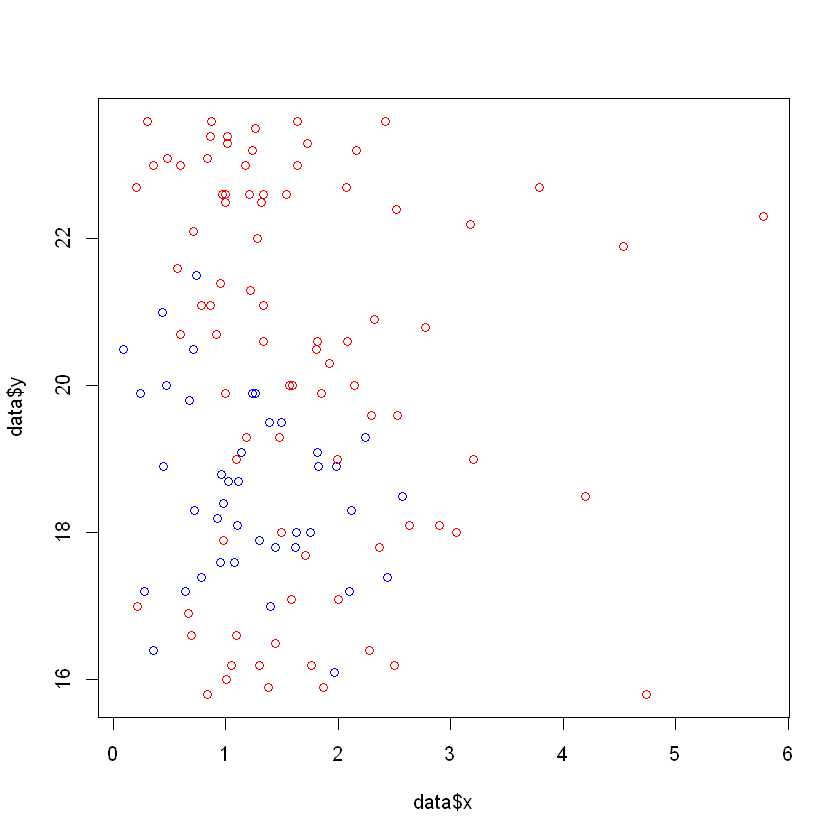

In [5]:
plot(data$x, data$y, col=ifelse(data$z, "red", "blue"))

## 1b) What is the likelihood and posterior?
Using the model above and the function f , write down the likelihood of the data (i.e., a formula for the probability of the data given the parameters of the model). 
Also, write down a function that is proportional to the posterior density for the parameters.

## 1c) 
Write an R function that takes as input values for two parameters $θ = (θ_1, θ_2, θ_3)$ and $\theta^{*}=(\theta_{1}^{*},\theta_{2}^{*},\theta_{3}^{*})$ and computes a function that is
equal to
$$
\log\left(\frac{\pi(\theta^{*}\mid\mathrm{data})}{\pi(\theta\mid\mathrm{data})}\right)
$$
i.e., the logarithm of the quotient of the posterior densities for $θ*∗$ andθ

## 1d) 
Implement an MCMC algorithm that generates a Markov chain of length 10000 with limiting distribution equal to the posterior for θ.

Use a proposal distribution which adds to each parameter a normally distributed variable with expectation zero and standard deviation 0.4. Find a starting value for the chain by studying what values for θ might be reasonable for the given data. 

Produce trace plots (plots mapping simulated values for $θ_i$ against its index i) for the parameters $θ_1, θ_2$, and $θ_3$.

## 1e)
Compute numerically the predicted probability that an animal at pollutant concentration x = 0.7 and temperature y = 19 will have the disease. 

Also, compute the predicted probability that among 10 animals exposed to this temperature and this pollutant concentration, 9 will have the disease.

# Exercise 2: Branching Process
Consider a branching process where the offspring distribution is a Poisson distribution with parameter λ = 1.4.

![](branching_process.png)

## 2a) 
Use R to compute the probability that such a process will go extinct.

## 2b) 
Consider the process whose first 5 steps are pictured in Figure 1.
Assume its offspring distribution is Poisson(1.4). What is the probability that the continuation of this process will go extinct?

## 2c) 
Now, consider instead a branching process with a Poisson(λ) offspring distribution where λ is unknown. We assume a prior $π(λ) ∝_\lambda \frac{1}{\lambda}$. Assume now that Figure 1 depicts a realization of this process. 

What is the resulting likelihood for λ? What is the posterior distribution for λ?

## 2d) 
We want to compute the probability of extinction of a branching process of the type of question (c), taking into account the uncertainty in λ. The extinction probability can then be written as an integral of a product of two functions of λ. Write down this integral and compute its value with R using numerical integration.

## 2e) 
Consider the process in in Figure 1, depicting a realization of a branching process with a Poisson(λ) offspring distribution with unknown λ, as in question (c). Compute the probability that the continuation of this process will go extinct.
